# Machine Learning - Randomized Optimization - knapsack

## 1. Import Modules

In [1]:
# Basic Modules
import numpy as np
import matplotlib.pyplot as plt
import time

# Data Related Modules
import pandas as pd

# Randomized Optimization
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [2]:
weights = []
value = []

for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))

## 2. RHC algorithm

### 2.1 Look for best "max_attempts" with "problem length" of 100 and "max_iters" of infinite

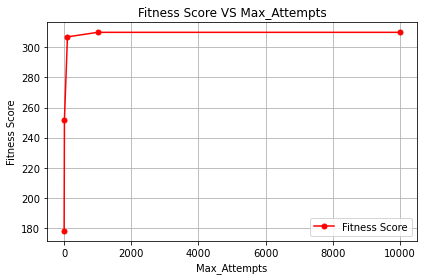

In [57]:
rhc_fitness_scores_one = []
rhc_iterations_one = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(
        problem=problem,
        max_attempts=i,
        max_iters=np.inf,
        restarts=0,
        init_state=None,
        curve=True,
        random_state=1)

    rhc_fitness_scores_one.append(rhc_best_fitness)
    rhc_iterations_one.append(i)

plt.plot(rhc_iterations_one, rhc_fitness_scores_one, color='red', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Attempts')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Attempts')
plt.tight_layout()

plt.show()

### 2.2 Look for best "max_iterations" with "problem length" of 100 and "max_attempts" of 1000

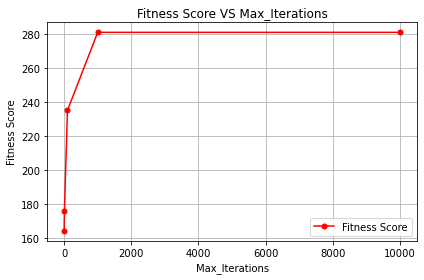

In [38]:
rhc_fitness_scores_two = []
rhc_iterations_two = []
rhc_time = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
    
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    t1 = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(
        problem=problem,
        max_attempts=1000,
        max_iters=i,
        restarts=0,
        init_state=None,
        curve=True,
        random_state=1)
    t2 = time.time()
    t3 = t2 - t1
    
    rhc_time.append(t3)
    rhc_fitness_scores_two.append(rhc_best_fitness)
    rhc_iterations_two.append(i)

plt.plot(rhc_iterations_two, rhc_fitness_scores_two, color='red', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Iterations')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Iterations')
plt.tight_layout()

plt.show()

### 2.3 Look for best "problem_length" with "max_iteration" of 10000 and "max_attempts" of 1000

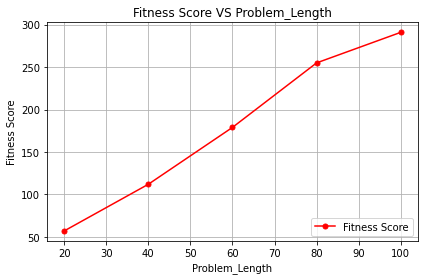

In [39]:
rhc_fitness_scores_three = []
rhc_iterations_three = []

for i in (20,40,60,80,100):
    weights = []
    value = []

    for j in range(0,i):
        weights.append(np.random.choice([10,20,30,40,50]))
        value.append(np.random.choice([1,2,3,4,5]))
    
    fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
    problem = mlrose.DiscreteOpt(length=i, fitness_fn=fitness, maximize=True, max_val=2)

    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(
        problem=problem,
        max_attempts=1000,
        max_iters=10000,
        restarts=0,
        init_state=None,
        curve=True,
        random_state=1)

    rhc_fitness_scores_three.append(rhc_best_fitness)
    rhc_iterations_three.append(i)

plt.plot(rhc_iterations_three, rhc_fitness_scores_three, color='red', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Problem_Length')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Problem_Length')
plt.tight_layout()
plt.show()

### 2.4 Look for "seed" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 100

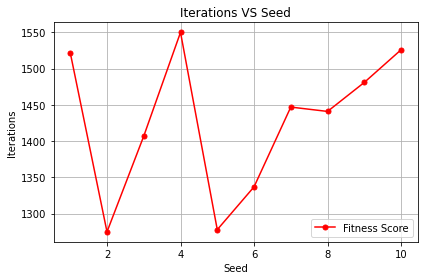

In [40]:
rhc_fitness_scores_four = []
rhc_iterations_four = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,2,3,4,5,6,7,8,9,10):
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(
        problem=problem,
        max_attempts=1000,
        max_iters=10000,
        restarts=0,
        init_state=None,
        curve=True,
        random_state=i)

    rhc_fitness_scores_four.append(len(rhc_fitness_curve))
    rhc_iterations_four.append(i)

plt.plot(rhc_iterations_four, rhc_fitness_scores_four, color='red', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Seed')
plt.ylabel('Iterations')
plt.legend(loc='lower right')
plt.title('Iterations VS Seed')
plt.tight_layout()
plt.show()

## 3. SA algorithm

### 3.1 Look for best "max_attempts" with "problem length" of 100 and "max_iters" of infinite

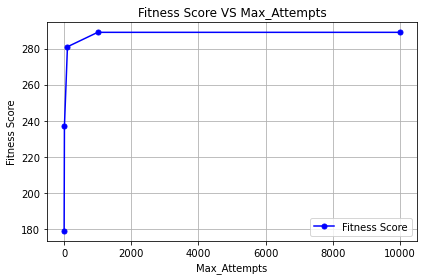

In [41]:
sa_fitness_scores_one = []
sa_iterations_one = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
        problem=problem,
        schedule=mlrose.GeomDecay(),
        max_attempts=i,
        max_iters=np.inf,
        init_state=None,
        curve=True,
        random_state=1)

    sa_fitness_scores_one.append(sa_best_fitness)
    sa_iterations_one.append(i)

plt.plot(sa_iterations_one, sa_fitness_scores_one, color='blue', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Attempts')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Attempts')
plt.tight_layout()

plt.show()

### 3.2 Look for best "max_iterations" with "problem length" of 100 and "max_attempts" of 1000

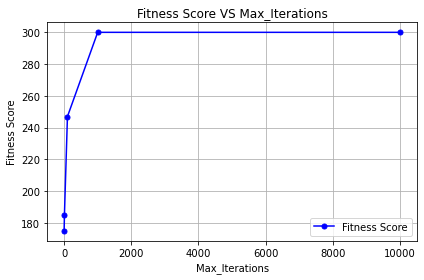

In [42]:
sa_fitness_scores_two = []
sa_iterations_two = []
sa_time = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    t1 = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
        problem=problem,
        schedule=mlrose.GeomDecay(),
        max_attempts=1000,
        max_iters=i,
        init_state=None,
        curve=True,
        random_state=1)
    t2 = time.time()
    t3 = t2 - t1
    
    sa_time.append(t3)
    sa_fitness_scores_two.append(sa_best_fitness)
    sa_iterations_two.append(i)

plt.plot(sa_iterations_two, sa_fitness_scores_two, color='blue', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Iterations')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Iterations')
plt.tight_layout()

plt.show()

### 3.3 Look for best "problem_length" with "max_iteration" of 10000 and "max_attempts" of 1000

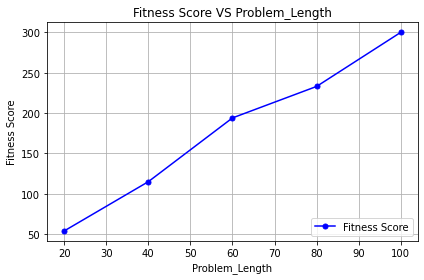

In [43]:
sa_fitness_scores_three = []
sa_iterations_three = []

for i in (20,40,60,80,100):
    weights = []
    value = []

    for j in range(0,i):
        weights.append(np.random.choice([10,20,30,40,50]))
        value.append(np.random.choice([1,2,3,4,5]))
    
    fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
    problem = mlrose.DiscreteOpt(length=i, fitness_fn=fitness, maximize=True, max_val=2)

    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
        problem=problem,
        schedule=mlrose.GeomDecay(),
        max_attempts=1000,
        max_iters=10000,
        init_state=None,
        curve=True,
        random_state=1)

    sa_fitness_scores_three.append(sa_best_fitness)
    sa_iterations_three.append(i)

plt.plot(sa_iterations_three, sa_fitness_scores_three, color='blue', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Problem_Length')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Problem_Length')
plt.tight_layout()
plt.show()

### 3.4 Look for "seed" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 80

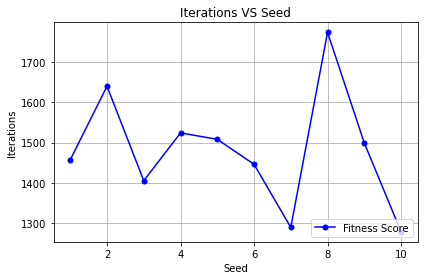

In [46]:
sa_fitness_scores_four = []
sa_iterations_four = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,2,3,4,5,6,7,8,9,10):
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
        problem=problem,
        schedule=mlrose.GeomDecay(),
        max_attempts=1000,
        max_iters=10000,
        init_state=None,
        curve=True,
        random_state=i)

    sa_fitness_scores_four.append(len(sa_fitness_curve))
    sa_iterations_four.append(i)

plt.plot(sa_iterations_four, sa_fitness_scores_four, color='blue', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Seed')
plt.ylabel('Iterations')
plt.legend(loc='lower right')
plt.title('Iterations VS Seed')
plt.tight_layout()
plt.show()

### 3.5 Look for "schedule" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 80

In [47]:
sa_fitness_scores_five = []
sa_iterations_five = []
sa_fitness_scores_five_len = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
    problem=problem,
    schedule=mlrose.GeomDecay(),
    max_attempts=1000,
    max_iters=10000,
    init_state=None,
    curve=True,
    random_state=1)

sa_fitness_scores_five.append(sa_best_fitness)
sa_fitness_scores_five_len.append(len(sa_fitness_curve))
sa_iterations_five.append("GeomDecay")

sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
    problem=problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=1000,
    max_iters=10000,
    init_state=None,
    curve=True,
    random_state=1)

sa_fitness_scores_five.append(sa_best_fitness)
sa_fitness_scores_five_len.append(len(sa_fitness_curve))
sa_iterations_five.append("ArithDecay")

sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
    problem=problem,
    schedule=mlrose.ExpDecay(),
    max_attempts=1000,
    max_iters=10000,
    init_state=None,
    curve=True,
    random_state=1)

sa_fitness_scores_five.append(sa_best_fitness)
sa_fitness_scores_five_len.append(len(sa_fitness_curve))
sa_iterations_five.append("ExpDecay")

print(sa_iterations_five)
print(sa_fitness_scores_five)
print(sa_fitness_scores_five_len)

['GeomDecay', 'ArithDecay', 'ExpDecay']
[318.0, 318.0, 318.0]
[1457, 8979, 1460]


## 4. GA algorithm

### 4.1 Look for best "max_attempts" with "problem length" of 100 and "max_iters" of infinite

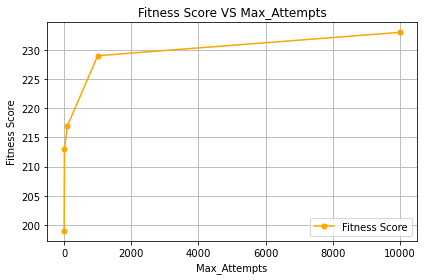

In [48]:
ga_fitness_scores_one = []
ga_iterations_one = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(
        problem=problem,
        pop_size=200,
        mutation_prob=0.1,
        max_attempts=i,
        max_iters=np.inf,
        curve=True,
        random_state=1)

    ga_fitness_scores_one.append(ga_best_fitness)
    ga_iterations_one.append(i)

plt.plot(ga_iterations_one, ga_fitness_scores_one, color='orange', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Attempts')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Attempts')
plt.tight_layout()

plt.show()

### 4.2 Look for best "max_iterations" with "problem length" of 100 and "max_attempts" of 1000

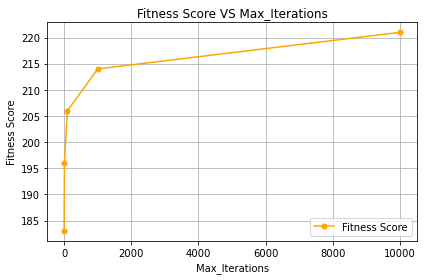

In [49]:
ga_fitness_scores_two = []
ga_iterations_two = []
ga_time = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    t1 = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(
        problem=problem,
        pop_size=200,
        mutation_prob=0.1,
        max_attempts=1000,
        max_iters=i,
        curve=True,
        random_state=1)
    t2 = time.time()
    t3 = t2 - t1
    
    ga_time.append(t3)
    ga_fitness_scores_two.append(ga_best_fitness)
    ga_iterations_two.append(i)

plt.plot(ga_iterations_two, ga_fitness_scores_two, color='orange', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Iterations')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Iterations')
plt.tight_layout()

plt.show()

### 4.3 Look for best "problem_length" with "max_iteration" of 10000 and "max_attempts" of 1000

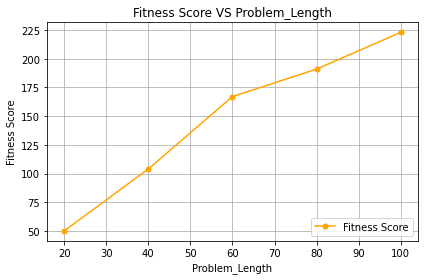

In [50]:
ga_fitness_scores_three = []
ga_iterations_three = []

for i in (20,40,60,80,100):
    weights = []
    value = []

    for j in range(0,i):
        weights.append(np.random.choice([10,20,30,40,50]))
        value.append(np.random.choice([1,2,3,4,5]))
    
    fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
    problem = mlrose.DiscreteOpt(length=i, fitness_fn=fitness, maximize=True, max_val=2)

    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(
        problem=problem,
        pop_size=200,
        mutation_prob=0.1,
        max_attempts=1000,
        max_iters=10000,
        curve=True,
        random_state=1)

    ga_fitness_scores_three.append(ga_best_fitness)
    ga_iterations_three.append(i)

plt.plot(ga_iterations_three, ga_fitness_scores_three, color='orange', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Problem_Length')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Problem_Length')
plt.tight_layout()
plt.show()

### 4.4 Look for "pop_size" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 100

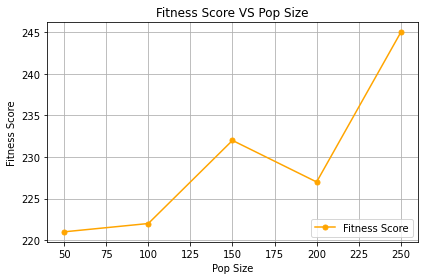

In [51]:
ga_fitness_scores_four = []
ga_iterations_four = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
    
for i in (50,100,150,200,250):
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(
        problem=problem,
        pop_size=i,
        mutation_prob=0.1,
        max_attempts=1000,
        max_iters=10000,
        curve=True,
        random_state=1)

    ga_fitness_scores_four.append(ga_best_fitness)
    ga_iterations_four.append(i)

plt.plot(ga_iterations_four, ga_fitness_scores_four, color='orange', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Pop Size')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Pop Size')
plt.tight_layout()
plt.show()

### 4.5 Look for "seed" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 100 and "pop_size"of 200

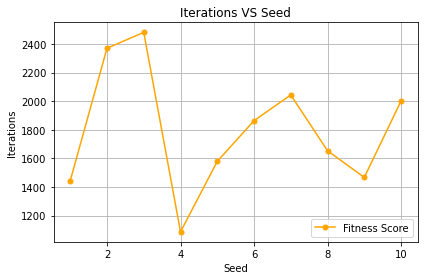

In [52]:
ga_fitness_scores_five = []
ga_iterations_five = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,2,3,4,5,6,7,8,9,10):
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(
        problem=problem,
        pop_size=200,
        mutation_prob=0.1,
        max_attempts=1000,
        max_iters=10000,
        curve=True,
        random_state=i)

    ga_fitness_scores_five.append(len(ga_fitness_curve))
    ga_iterations_five.append(i)

plt.plot(ga_iterations_five, ga_fitness_scores_five, color='orange', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Seed')
plt.ylabel('Iterations')
plt.legend(loc='lower right')
plt.title('Iterations VS Seed')
plt.tight_layout()
plt.show()

## 5. MIMIC algorithm

### 5.1 Look for best "max_attempts" with "problem length" of 100 and "max_iters" of infinite

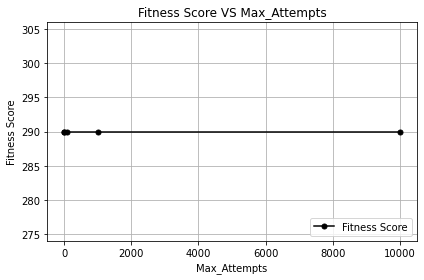

In [58]:
mimic_fitness_scores_one = []
mimic_iterations_one = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
        problem=problem,
        pop_size=200,
        keep_pct=0.2,
        max_attempts=i,
        max_iters=10000,
        curve=True,
        random_state=1,
        fast_mimic=True)

    mimic_fitness_scores_one.append(mimic_best_fitness)
    mimic_iterations_one.append(i)

plt.plot(mimic_iterations_one, mimic_fitness_scores_one, color='black', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Attempts')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Attempts')
plt.tight_layout()

plt.show()

### 5.2 Look for best "max_iterations" with "problem length" of 100 and "max_attempts" of 1000

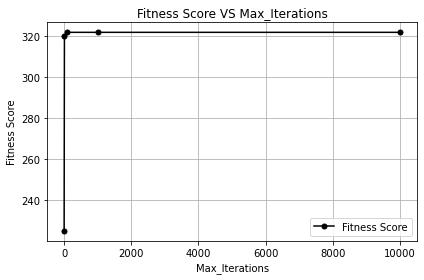

In [59]:
mimic_fitness_scores_two = []
mimic_iterations_two = []
mimic_time = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,10,100,1000,10000):
    t1 = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
        problem=problem,
        pop_size=200,
        keep_pct=0.2,
        max_attempts=1000,
        max_iters=i,
        curve=True,
        random_state=1,
        fast_mimic=True)
    t2 = time.time()
    t3 = t2 - t1
    
    mimic_time.append(t3)
    mimic_fitness_scores_two.append(mimic_best_fitness)
    mimic_iterations_two.append(i)

plt.plot(mimic_iterations_two, mimic_fitness_scores_two, color='black', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Max_Iterations')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Iterations')
plt.tight_layout()

plt.show()

### 5.3 Look for best "problem_length" with "max_iteration" of 10000 and "max_attempts" of 1000

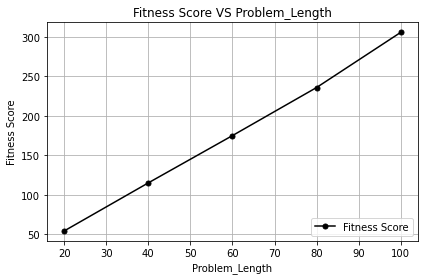

In [74]:
mimic_fitness_scores_three = []
mimic_iterations_three = []

for i in (20,40,60,80,100):
    weights = []
    value = []

    for j in range(0,i):
        weights.append(np.random.choice([10,20,30,40,50]))
        value.append(np.random.choice([1,2,3,4,5]))
    
    fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
    problem = mlrose.DiscreteOpt(length=i, fitness_fn=fitness, maximize=True, max_val=2)

    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
        problem=problem,
        pop_size=250,
        keep_pct=0.2,
        max_attempts=1000,
        max_iters=1000,
        curve=True,
        random_state=1,
        fast_mimic=True)

    mimic_fitness_scores_three.append(mimic_best_fitness)
    mimic_iterations_three.append(i)

plt.plot(mimic_iterations_three, mimic_fitness_scores_three, color='black', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Problem_Length')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Problem_Length')
plt.tight_layout()
plt.show()

In [73]:
weights = []
value = []

for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))

fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
    problem=problem,
    pop_size=250,
    keep_pct=0.2,
    max_attempts=1000,
    max_iters=1000,
    curve=True,
    random_state=1,
    fast_mimic=True)

print()
print(mimic_best_fitness)
print()


330.0



### 5.4 Look for "pop_size" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 100

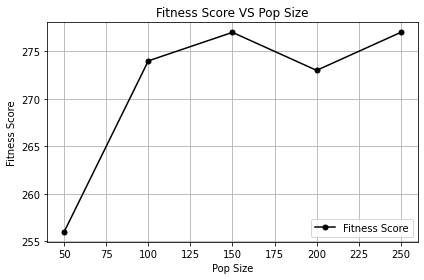

In [61]:
mimic_fitness_scores_four = []
mimic_iterations_four = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
    
for i in (50,100,150,200,250):
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
        problem=problem,
        pop_size=i,
        keep_pct=0.2,
        max_attempts=1000,
        max_iters=10000,
        curve=True,
        random_state=1,
        fast_mimic=True)

    mimic_fitness_scores_four.append(mimic_best_fitness)
    mimic_iterations_four.append(i)

plt.plot(mimic_iterations_four, mimic_fitness_scores_four, color='black', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Pop Size')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Pop Size')
plt.tight_layout()
plt.show()

### 5.5 Look for "seed" with "max_iteration" of 10000 and "max_attempts" of 1000 and "problem_length" of 100 and "pop_size"of 200

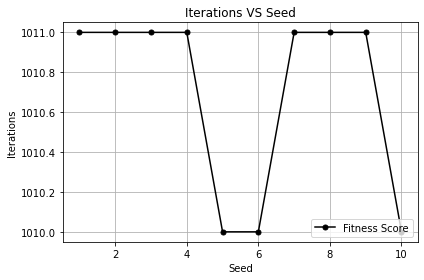

In [62]:
mimic_fitness_scores_five = []
mimic_iterations_five = []

weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

for i in (1,2,3,4,5,6,7,8,9,10):
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
        problem=problem,
        pop_size=200,
        keep_pct=0.2,
        max_attempts=1000,
        max_iters=10000,
        curve=True,
        random_state=i,
        fast_mimic=True)

    mimic_fitness_scores_five.append(len(mimic_fitness_curve))
    mimic_iterations_five.append(i)

plt.plot(mimic_iterations_five, mimic_fitness_scores_five, color='black', marker='o', markersize=5, label='Fitness Score')
plt.grid()
plt.xlabel('Seed')
plt.ylabel('Iterations')
plt.legend(loc='lower right')
plt.title('Iterations VS Seed')
plt.tight_layout()
plt.show()

## 6. Comparison Graphs

### 6.1 Graph of Iteration VS Fitness Score

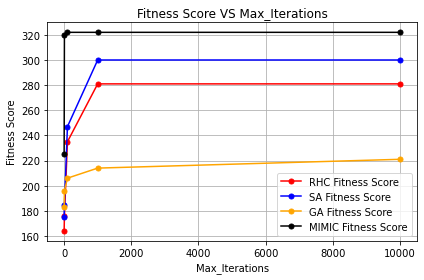

In [63]:
plt.plot(rhc_iterations_two, rhc_fitness_scores_two, color='red', marker='o', markersize=5, label='RHC Fitness Score')
plt.plot(sa_iterations_two, sa_fitness_scores_two, color='blue', marker='o', markersize=5, label='SA Fitness Score')
plt.plot(ga_iterations_two, ga_fitness_scores_two, color='orange', marker='o', markersize=5, label='GA Fitness Score')
plt.plot(mimic_iterations_two, mimic_fitness_scores_two, color='black', marker='o', markersize=5, label='MIMIC Fitness Score')

plt.grid()
plt.xlabel('Max_Iterations')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Max_Iterations')
plt.tight_layout()
plt.show()

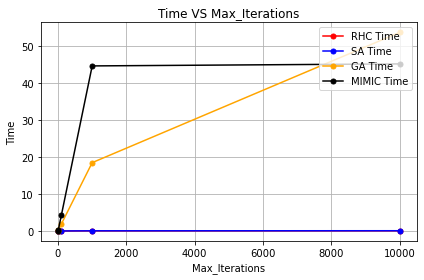

In [64]:
plt.plot(rhc_iterations_two, rhc_time, color='red', marker='o', markersize=5, label='RHC Time')
plt.plot(sa_iterations_two, sa_time, color='blue', marker='o', markersize=5, label='SA Time')
plt.plot(ga_iterations_two, ga_time, color='orange', marker='o', markersize=5, label='GA Time')
plt.plot(mimic_iterations_two, mimic_time, color='black', marker='o', markersize=5, label='MIMIC Time')

plt.grid()
plt.xlabel('Max_Iterations')
plt.ylabel('Time')
plt.legend(loc='upper right')
plt.title('Time VS Max_Iterations')
plt.tight_layout()
plt.show()

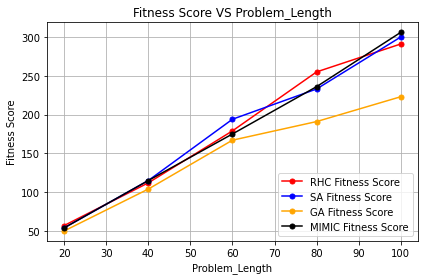

In [75]:
plt.plot(rhc_iterations_three, rhc_fitness_scores_three, color='red', marker='o', markersize=5, label='RHC Fitness Score')
plt.plot(sa_iterations_three, sa_fitness_scores_three, color='blue', marker='o', markersize=5, label='SA Fitness Score')
plt.plot(ga_iterations_three, ga_fitness_scores_three, color='orange', marker='o', markersize=5, label='GA Fitness Score')
plt.plot(mimic_iterations_three, mimic_fitness_scores_three, color='black', marker='o', markersize=5, label='MIMIC Fitness Score')

plt.grid()
plt.xlabel('Problem_Length')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Problem_Length')
plt.tight_layout()
plt.show()

C:\Users\wonpe\anaconda3\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


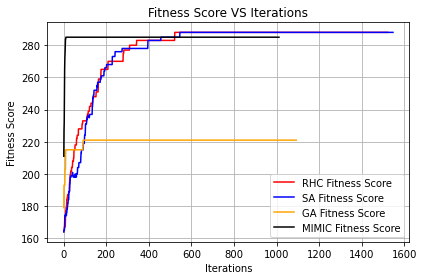

In [67]:
weights = []
value = []
for i in range(0,100):
    weights.append(np.random.choice([10,20,30,40,50]))
    value.append(np.random.choice([1,2,3,4,5]))
fitness = mlrose.Knapsack(weights=weights,values=value,max_weight_pct=1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(
    problem=problem,
    max_attempts=1000,
    max_iters=10000,
    restarts=0,
    init_state=None,
    curve=True,
    random_state=1)

sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(
    problem=problem,
    schedule=mlrose.GeomDecay(),
    max_attempts=1000,
    max_iters=10000,
    init_state=None,
    curve=True,
    random_state=1)

ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(
    problem=problem,
    pop_size=200,
    mutation_prob=0.1,
    max_attempts=1000,
    max_iters=10000,
    curve=True,
    random_state=1)

mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(
    problem=problem,
    pop_size=250,
    keep_pct=0.2,
    max_attempts=1000,
    max_iters=10000,
    curve=True,
    random_state=1,
    fast_mimic=True)

iterations_rhc=[]
for i in range(1,len(rhc_fitness_curve)+1):
    iterations_rhc.append(i)

iterations_sa=[]
for i in range(1,len(sa_fitness_curve)+1):
    iterations_sa.append(i)

iterations_ga=[]
for i in range(1,len(ga_fitness_curve)+1):
    iterations_ga.append(i)

iterations_mimic=[]
for i in range(1,len(mimic_fitness_curve)+1):
    iterations_mimic.append(i)
    
plt.plot(iterations_rhc, rhc_fitness_curve, color='red', label='RHC Fitness Score')
plt.plot(iterations_sa, sa_fitness_curve, color='blue', label='SA Fitness Score')    
plt.plot(iterations_ga, ga_fitness_curve, color='orange', label='GA Fitness Score')    
plt.plot(iterations_mimic, mimic_fitness_curve, color='black', label='MIMIC Fitness Score')    
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.legend(loc='lower right')
plt.title('Fitness Score VS Iterations')
plt.tight_layout()
plt.show()